<a href="https://colab.research.google.com/github/pravallikasri0229/pravallika-analyst-/blob/main/decisiontree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics #evaluation of model
import seaborn as sn

In [ ]:
column_names = [ 'pregnant', 'glucose','bp','skin','insulin','bmi','pedigree','age','label']
data = pd.read_csv("/content/drive/MyDrive/diabets - diabets.csv",header=None,names= column_names)
data.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
data.ndim #dimensions

2

data.shape

data.shape

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
feature_cols = ['pregnant','glucose','bp','insulin','bmi','pedigree','age']
x = data[feature_cols]
print(x)

     pregnant  glucose  bp  insulin   bmi  pedigree  age
0           6      148  72        0  33.6     0.627   50
1           1       85  66        0  26.6     0.351   31
2           8      183  64        0  23.3     0.672   32
3           1       89  66       94  28.1     0.167   21
4           0      137  40      168  43.1     2.288   33
..        ...      ...  ..      ...   ...       ...  ...
763        10      101  76      180  32.9     0.171   63
764         2      122  70        0  36.8     0.340   27
765         5      121  72      112  26.2     0.245   30
766         1      126  60        0  30.1     0.349   47
767         1       93  70        0  30.4     0.315   23

[768 rows x 7 columns]


#confusion metrics : "It helps to see how good the model is"
it gives clarity is it accurate or not


In [ ]:


data.columns
x = data[['pregnant', 'glucose', 'bp', 'insulin', 'bmi', 'pedigree','age']]
y = data['label']

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.8)
print(xtrain.shape,xtrain.ndim)
print(xtest.shape,xtest.ndim)
print(ytrain.shape,ytrain.ndim)
print(ytest.shape,ytest.ndim)

(614, 7) 2
(154, 7) 2
(614,) 1
(154,) 1


In [ ]:
model = DecisionTreeClassifier(criterion='entropy')
model.fit(xtrain,ytrain)
ytest_predicted = model.predict(xtest)

In [ ]:
metrics.confusion_matrix(ytest,ytest_predicted)

array([[75, 31],
       [20, 28]])

[75,31] 75 records it predicted right , 31 rec predicted wrong
[20,28] 20 wrong , 28 right

<Axes: xlabel='Predicted', ylabel='Actual'>

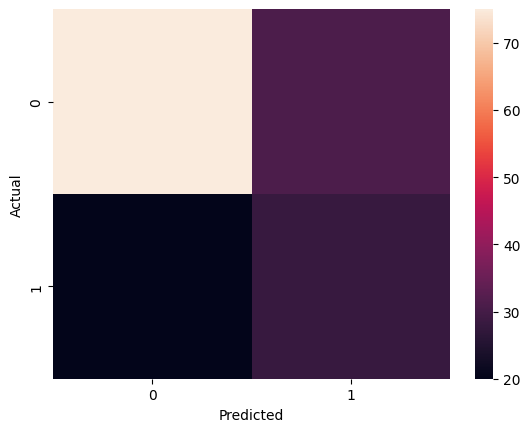

In [ ]:
conf_mat = pd.crosstab(ytest,ytest_predicted,rownames=["Actual"],colnames=["Predicted"])
sn.heatmap(conf_mat)

In [ ]:
accuracy = metrics.accuracy_score(ytest,ytest_predicted)
print("Accuracy of model is : ",(accuracy*100))

Accuracy of model is :  66.88311688311688
